In [17]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import scipy.stats as st

plt.style.use("seaborn")
sns.set_context("talk", font_scale=1.4)
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
possible_shift_outcomes = [0]*1567 + [1]*74
print(possible_shift_outcomes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [3]:
def simulate_shifts_with_deaths(possible_shift_outcomes, num_shifts):
    return sum(random.sample(possible_shift_outcomes, num_shifts))

In [4]:
simulate_shifts_with_deaths(possible_shift_outcomes, 257)

7

In [12]:
def compute_number_of_death_shifts(possible_shift_outcomes, num_shifts, n):
    results = [0]*num_shifts
    for i in range(n):
        number_shifts_with_deaths = simulate_shifts_with_deaths(possible_shift_outcomes, num_shifts)
        results[number_shifts_with_deaths] += 1

    return results

In [19]:
outcomes = compute_number_of_death_shifts(possible_shift_outcomes, 257, 100000)

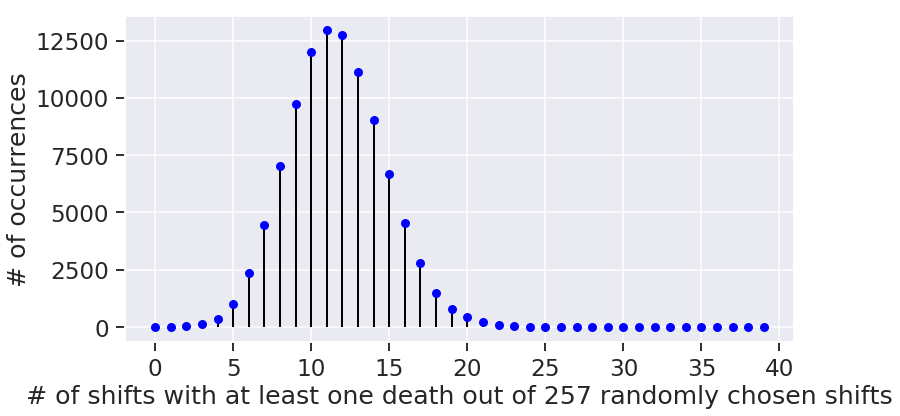

In [20]:
fig, ax = plt.subplots()
x_null = np.arange(0, 40)
ax.plot(x_null, outcomes[0:40], 'bo')
ax.vlines(x_null, 0, outcomes, lw=2)
ax.set_xlabel('# of shifts with at least one death out of 257 randomly chosen shifts')
ax.set_ylabel('# of occurrences');

In [42]:
outcomes[25]

12

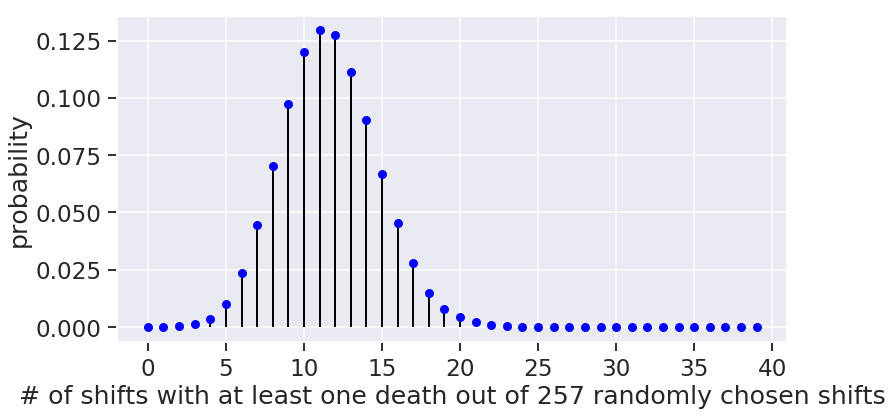

In [23]:
fig, ax = plt.subplots()
x_null = np.arange(0, 40)
pmf_null = np.array(outcomes) / sum(outcomes)
ax.plot(x_null, pmf_null[0:40], 'bo')
ax.vlines(x_null, 0, pmf_null, lw=2)
ax.set_xlabel('# of shifts with at least one death out of 257 randomly chosen shifts')
ax.set_ylabel('probability');

## Exact Solution

In [43]:
x, T, G, N = 39, 1641, 74, 257
M, n = T+G, G
st.hypergeom.sf(x, M, n, N)

9.1121622071405691e-16